## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data
df = pd.read_excel('/content/drive/MyDrive/CaseProject/titanic.xlsx')
data = df.copy()

# Preliminary

In [ ]:
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [ ]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [ ]:
data.sample(5)

,survived,name,sex,age
323,0,"Abelson, Mr. Samuel",male,30.0
220,1,"Ostby, Miss. Helene Ragnhild",female,22.0
280,1,"Stengel, Mr. Charles Emil Henry",male,54.0
131,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.0
390,0,"de Brito, Mr. Jose Joaquim",male,32.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


**Observation:**

1. The dataset contains **500 entries (rows)**, representing individual Titanic passengers.
2. There are 4 columns in the table, which are **survived, name, age, and sex.**
3. The age column has 451 non-null values out of 500, which means there are **49 missing values**, while the other 3 columns have no missing values.





# Statistical Summary


In [ ]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
categoricals = ['sex']
numericals = ['age', 'survived']
texts = ['name']

In [ ]:
data[numericals].describe()

,age,survived
count,451.000000,500.000000
mean,35.917775,0.540000
std,14.766454,0.498897
min,0.666700,0.000000
25%,24.000000,0.000000
50%,35.000000,1.000000
75%,47.000000,1.000000
max,80.000000,1.000000


Observation:

1. In the `age` column, there are 49 empty entries. Therefore, reprocessing will be done.
2. The `age` distribution is quite large, at 41%
3. The mean is approximately equal to the median, suggesting a fairly symmetrical distribution with minimal skewness.
4. `survived` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity. Only need to check balance level

In [ ]:
data[categoricals].describe()

,sex
count,500
unique,2
top,male
freq,288


Observation:

1. the `sex` field has 2 unique values, male and female
2. There were more men, with a total of 288 people, while the rest were women.

In [ ]:
data[texts].describe()

,name
count,500
unique,499
top,"Eustis, Miss. Elizabeth Mussey"
freq,2


In [ ]:
data[data['name'] == 'Eustis, Miss. Elizabeth Mussey']

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


Observation:

1. the unique value is only 499 out of 500, which means there is one duplicate data
2. because after seeing that the data is exactly the same in one row, one of them will be deleted

In [ ]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of sex column
sex
male      288
female    212
Name: count, dtype: int64 



In [ ]:
for col in numericals:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     1
45.5000     1
13.0000     1
67.0000     1
12.0000     1
0.8333      1
0.

# Data Cleaning

## 1. Duplicate Handling

In [ ]:
len(data)

500

In [ ]:
len(data.drop_duplicates())

499

In [ ]:
len(data.drop_duplicates()) / len(data)

0.998

In [ ]:
list(data.columns)

['survived', 'name', 'sex', 'age']

In [ ]:
# Take duplicate rows (including the original)
duplicates = data[data.duplicated(keep=False)]

In [ ]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [ ]:
#Handling Drop duplicate
data = data.drop_duplicates()

In [ ]:
 len(data.drop_duplicates()) / len(data)

1.0

Duplicate drop has been handled

## 2. Missing value handling

In [ ]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


*   Titanic passengers came from various age groups, ranging from 7 months to 80 years old.


In [ ]:
total_rows = len(data)
total_rows

499

In [ ]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
total_rows = len(data)

for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)")

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


The percentage of missing values below 20% so we handle numerically with median, categorical with mode.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [ ]:
data['age'].median()
data['age'].fillna(data['age'].median(), inplace=True)

<ipython-input-30-5fb1196eb938>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


In [ ]:
data.isnull().sum()

,0
survived,0
name,0
sex,0
age,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [ ]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculating correlation between numeric columns
correlation_matrix = numerical_data.corr()
print(correlation_matrix)


          survived       age
survived  1.000000 -0.139394
age      -0.139394  1.000000


# Visualized data

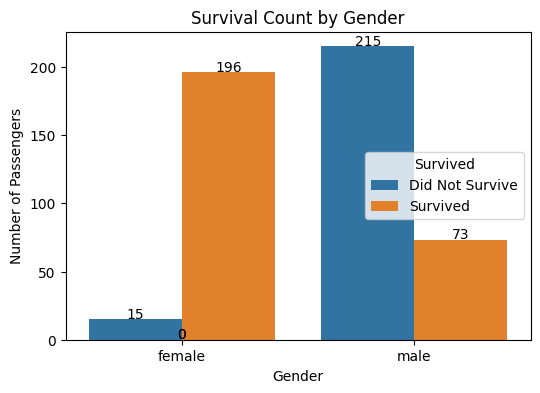

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(data=data, x='sex', hue='survived')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

# Tambahkan label angka di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1,
            '{:1.0f}'.format(height), ha="center")

plt.show()

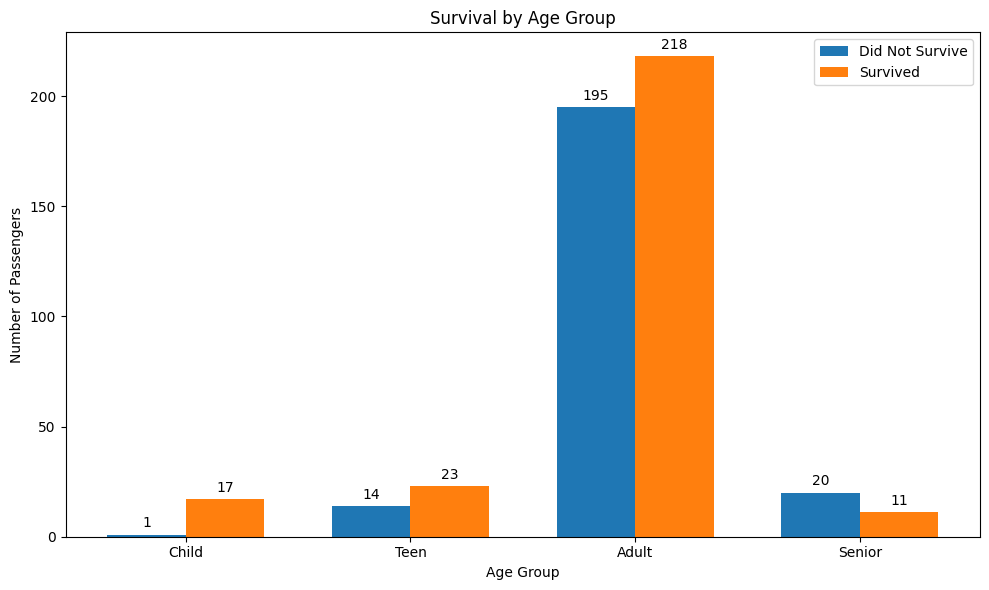

In [ ]:
# Step 1: Buat fungsi untuk mengkategorikan usia
def categorize_age(age):
    if age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Step 2: Terapkan fungsi ke dataframe untuk membuat kolom age_group
data['age_group'] = data['age'].apply(categorize_age)

# Step 3: Buat dataframe untuk menghitung jumlah orang berdasarkan age_group dan survived
survival_by_age = pd.crosstab(data['age_group'], data['survived'])

# Step 4: Ubah nama kolom untuk kejelasan
survival_by_age.columns = ['Did Not Survive', 'Survived']

# Step 5: Atur urutan kategori usia yang diinginkan
age_order = ['Child', 'Teen', 'Adult', 'Senior']
survival_by_age = survival_by_age.reindex(age_order)

# Step 6: Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))

# Posisi bar
x = np.arange(len(age_order))
width = 0.35

# Membuat bars
rects1 = ax.bar(x - width/2, survival_by_age['Did Not Survive'], width, label='Did Not Survive', color='#1f77b4')
rects2 = ax.bar(x + width/2, survival_by_age['Survived'], width, label='Survived', color='#ff7f0e')

# Menambahkan label dan judul
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Passengers')
ax.set_title('Survival by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(age_order)
ax.legend()

# Menambahkan anotasi jumlah pada setiap bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

# Menampilkan grafik
plt.tight_layout()
plt.show()

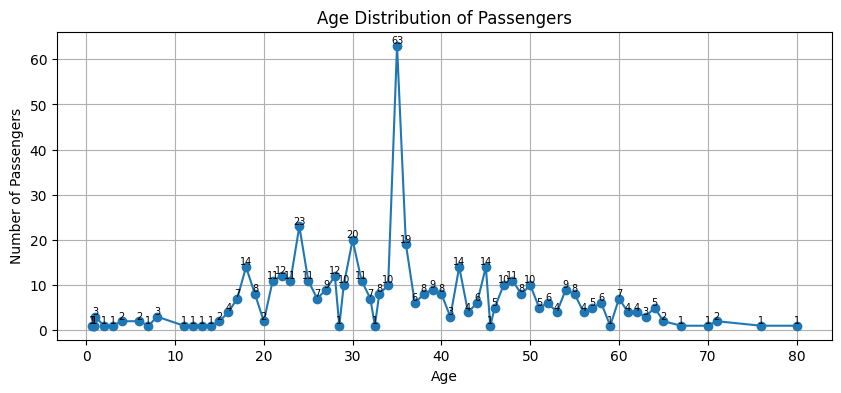

In [ ]:
age_counts = data['age'].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.plot(age_counts.index, age_counts.values, marker='o')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.grid(True)

# Tambahkan angka tiap titik
for x, y in zip(age_counts.index, age_counts.values):
    plt.text(x, y + 0.5, str(y), ha='center', fontsize=7)

plt.show()

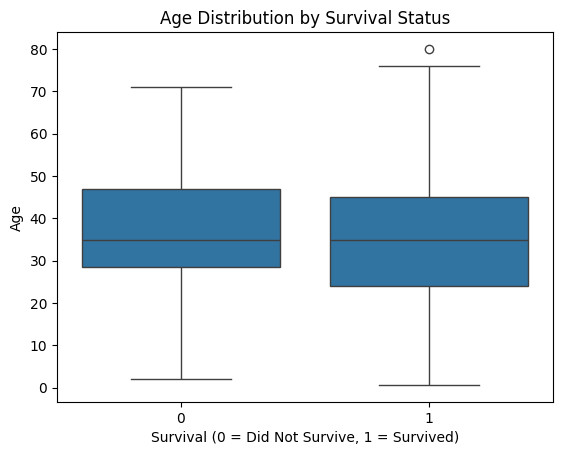

In [ ]:
sns.boxplot(data=data, x='survived', y='age')
plt.title("Age Distribution by Survival Status")
plt.xlabel("Survival (0 = Did Not Survive, 1 = Survived)")
plt.ylabel("Age")
plt.show()

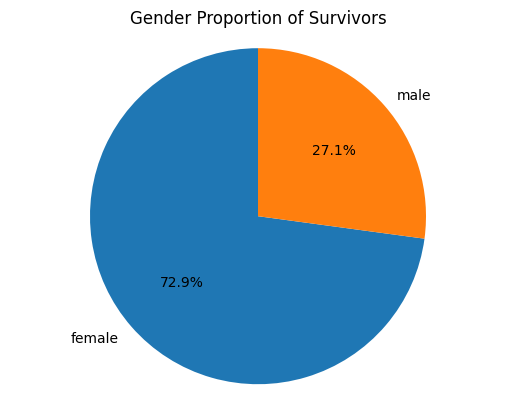

In [ ]:
survivors = data[data['survived'] == 1]
gender_counts = survivors['sex'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Proportion of Survivors")
plt.axis('equal')
plt.show()


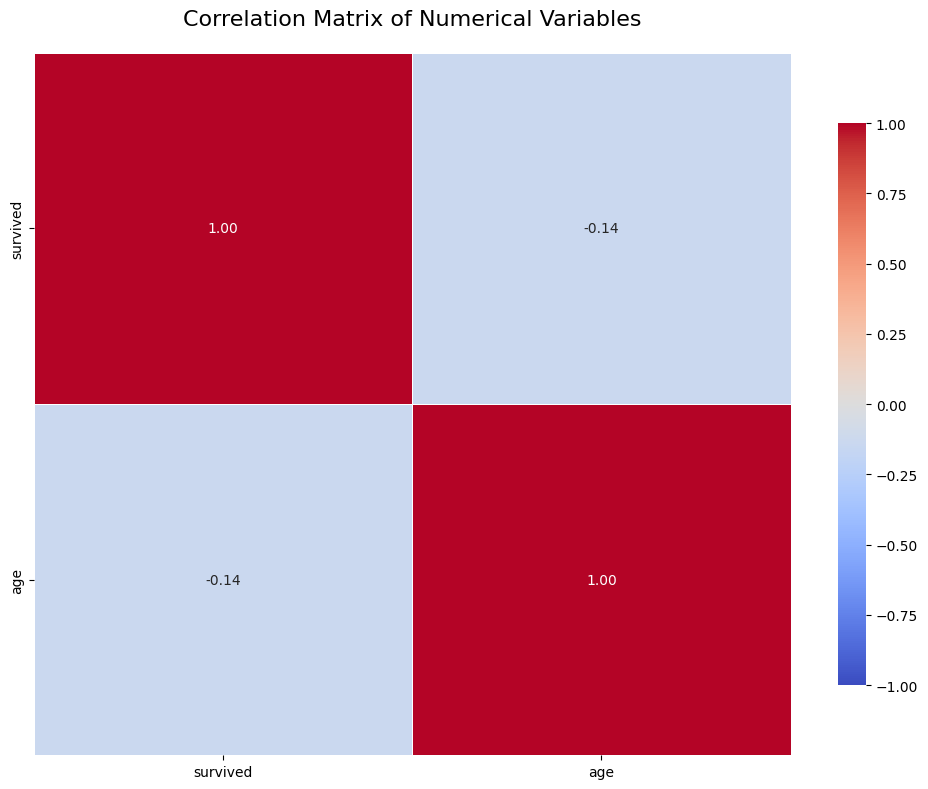

In [ ]:
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix,
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme (red negative, blue positive)
            vmin=-1,              # Minimum value for color scale
            vmax=1,               # Maximum value for color scale
            fmt='.2f',            # Format numbers to 2 decimal places
            linewidths=0.5,       # Width of grid lines
            cbar_kws={"shrink": .8})  # Customize colorbar

# Add title
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, pad=20)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()